# **Daily Data Merged**

**Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express  as px

Loading the Data

In [3]:
df = pd.read_csv('/content/daily_stats.csv')

Basic Analysis

In [4]:
df.head(3)

,Id,ActivityDate,DailyAverageHeartrate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,...,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutesAsleep,TotalSleepRecords,TotalTimeInBed,BMI,WeightKg,WeightPounds
0,1503960366,01-05-2016,NaN,10602,6.81,6.81,0.0,2.29,1.60,2.92,...,35,246,730,1820,369.0,1.0,396.0,NaN,NaN,NaN
1,1503960366,02-05-2016,NaN,14727,9.71,9.71,0.0,3.21,0.57,5.92,...,15,277,798,2004,277.0,1.0,309.0,22.65,52.6,115.96
2,1503960366,03-05-2016,NaN,15103,9.66,9.66,0.0,3.73,1.05,4.88,...,24,254,816,1990,273.0,1.0,296.0,22.65,52.6,115.96


Checking for null values

In [5]:
df.isna().sum()

Id                            0
ActivityDate                  0
DailyAverageHeartrate       606
TotalSteps                    0
TotalDistance                 0
TrackerDistance               0
LoggedActivitiesDistance      0
VeryActiveDistance            0
ModeratelyActiveDistance      0
LightActiveDistance           0
SedentaryActiveDistance       0
VeryActiveMinutes             0
FairlyActiveMinutes           0
LightlyActiveMinutes          0
SedentaryMinutes              0
Calories                      0
TotalMinutesAsleep          530
TotalSleepRecords           530
TotalTimeInBed              530
BMI                         873
WeightKg                    873
WeightPounds                873
dtype: int64

In [6]:
df['Id'].unique()

array([1503960366, 1624580081, 1644430081, 1844505072, 1927972279,
       2022484408, 2026352035, 2320127002, 2347167796, 2873212765,
       3372868164, 3977333714, 4020332650, 4057192912, 4319703577,
       4388161847, 4445114986, 4558609924, 4702921684, 5553957443,
       5577150313, 6117666160, 6290855005, 6775888955, 6962181067,
       7007744171, 7086361926, 8053475328, 8253242879, 8378563200,
       8583815059, 8792009665, 8877689391])

In [7]:
num_unique_ids = df['Id'].nunique()
print("Number of unique IDs:", num_unique_ids)

Number of unique IDs: 33


**Adding names to the unique ID's**

In [8]:
df2 = pd.read_csv('/content/Indian-Female-Names.csv')

In [9]:
df2.head(3)

,name,gender,race
0,shivani,f,indian
1,isha,f,indian
2,smt shyani devi,f,indian


In [10]:
import pandas as pd
import random

names = df2['name'].unique()

assert len(names) >= 33, "You need at least 33 unique names in 'df2'."

selected_names = names[:33]

mapping_dict = dict(zip(df['Id'].unique(), selected_names))

df['Name'] = df['Id'].map(mapping_dict)

print(df.head())


           Id ActivityDate  DailyAverageHeartrate  TotalSteps  TotalDistance  \
0  1503960366   01-05-2016                    NaN       10602           6.81   
1  1503960366   02-05-2016                    NaN       14727           9.71   
2  1503960366   03-05-2016                    NaN       15103           9.66   
3  1503960366   04-05-2016                    NaN       11100           7.15   
4  1503960366   05-05-2016                    NaN       14070           8.90   

   TrackerDistance  LoggedActivitiesDistance  VeryActiveDistance  \
0             6.81                       0.0                2.29   
1             9.71                       0.0                3.21   
2             9.66                       0.0                3.73   
3             7.15                       0.0                2.46   
4             8.90                       0.0                2.92   

   ModeratelyActiveDistance  LightActiveDistance  ...  LightlyActiveMinutes  \
0                      1.60    

In [11]:
df.columns

Index(['Id', 'ActivityDate', 'DailyAverageHeartrate', 'TotalSteps',
       'TotalDistance', 'TrackerDistance', 'LoggedActivitiesDistance',
       'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories',
       'TotalMinutesAsleep', 'TotalSleepRecords', 'TotalTimeInBed', 'BMI',
       'WeightKg', 'WeightPounds', 'Name'],
      dtype='object')

Rearranging the column Names

In [12]:
# Rearrange the column names
new_order = ['Id', 'Name', 'ActivityDate', 'DailyAverageHeartrate', 'TotalSteps',
             'TotalDistance', 'TrackerDistance', 'LoggedActivitiesDistance',
             'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance',
             'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
             'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories',
             'TotalMinutesAsleep', 'TotalSleepRecords', 'TotalTimeInBed', 'BMI',
             'WeightKg', 'WeightPounds']

# Reindex the DataFrame columns
df = df.reindex(columns=new_order)

# Display the DataFrame with the new column order
print(df.head())


           Id     Name ActivityDate  DailyAverageHeartrate  TotalSteps  \
0  1503960366  shivani   01-05-2016                    NaN       10602   
1  1503960366  shivani   02-05-2016                    NaN       14727   
2  1503960366  shivani   03-05-2016                    NaN       15103   
3  1503960366  shivani   04-05-2016                    NaN       11100   
4  1503960366  shivani   05-05-2016                    NaN       14070   

   TotalDistance  TrackerDistance  LoggedActivitiesDistance  \
0           6.81             6.81                       0.0   
1           9.71             9.71                       0.0   
2           9.66             9.66                       0.0   
3           7.15             7.15                       0.0   
4           8.90             8.90                       0.0   

   VeryActiveDistance  ModeratelyActiveDistance  ...  FairlyActiveMinutes  \
0                2.29                      1.60  ...                   35   
1                3.21 

In [13]:
df['Name'].value_counts()

shivani               31
neetu                 31
versha                31
rakhi @payal          31
gulshan               31
leela with a child    31
riya masi             31
reena                 31
shakshi               31
manju                 31
isha                  31
anshu d/o             31
kanika kathuria       31
nitu kumari           31
mansi                 31
sonam                 31
kajal                 31
shakshi sagar         31
pooja                 31
divya                 31
mazida                31
hina                  30
smt shyani devi       30
neha                  30
sunita                29
aasmin                29
khushboo              28
jyoti                 26
rekha                 26
buity                 20
priya jain            19
meena                 18
anita                  4
Name: Name, dtype: int64

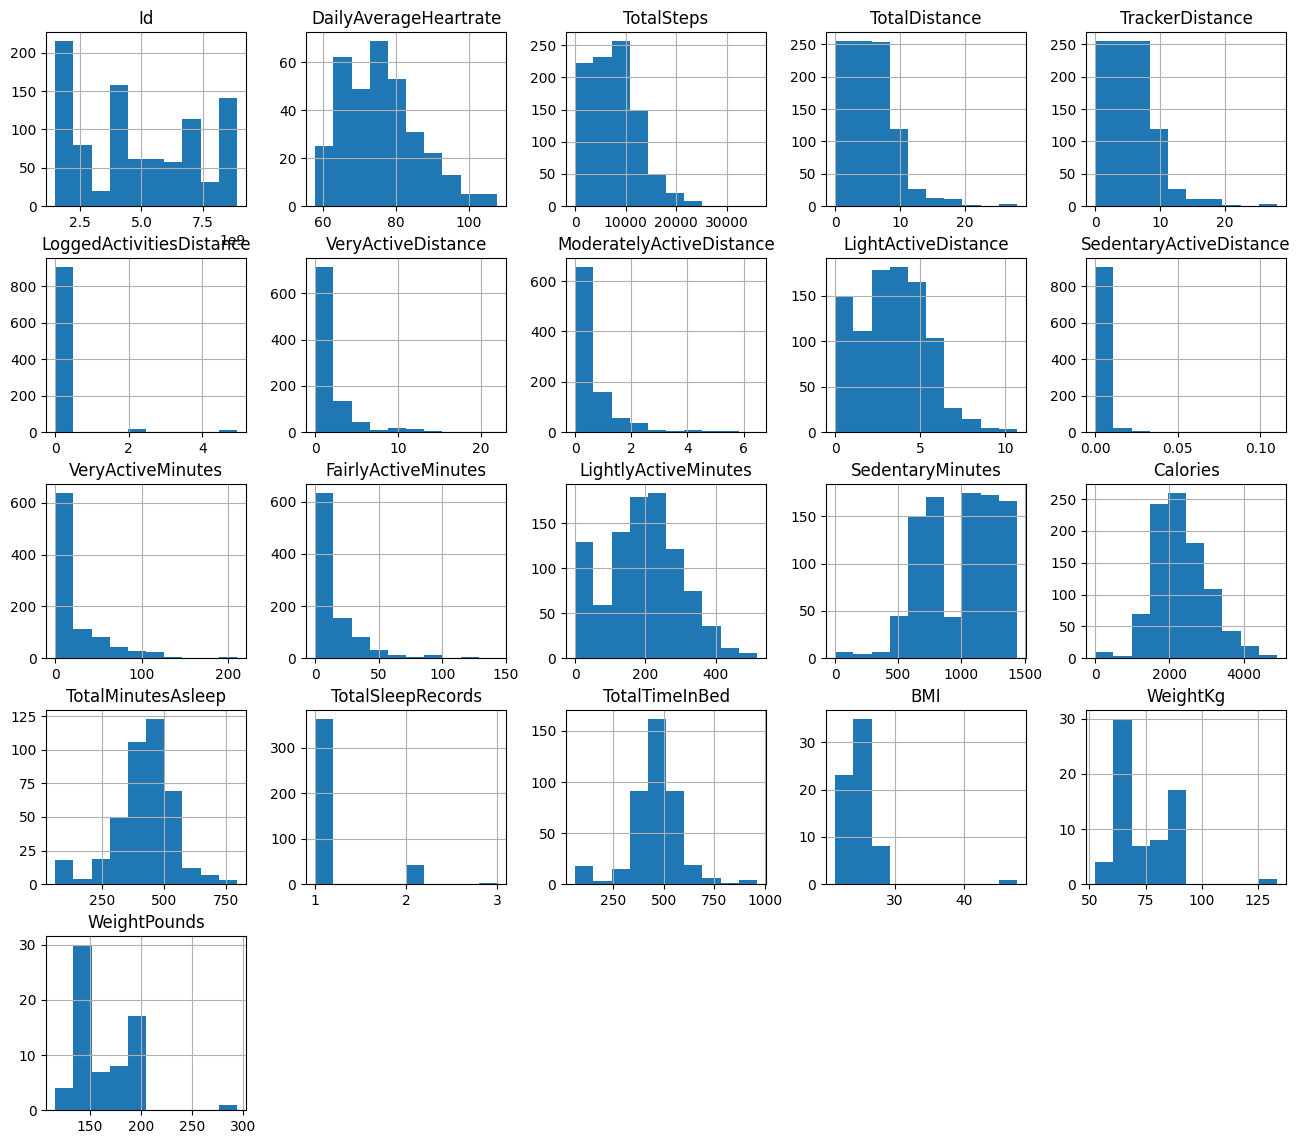

In [14]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols].hist(figsize=(16, 14))
plt.show()


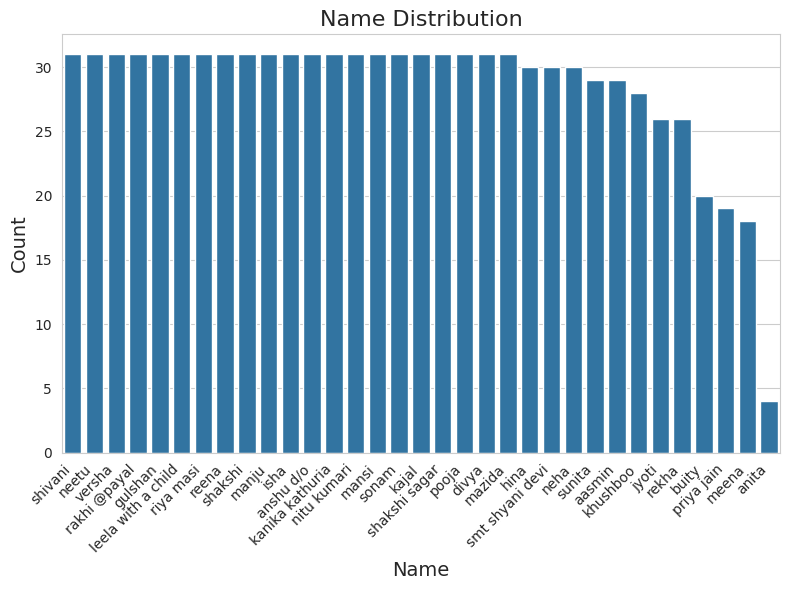

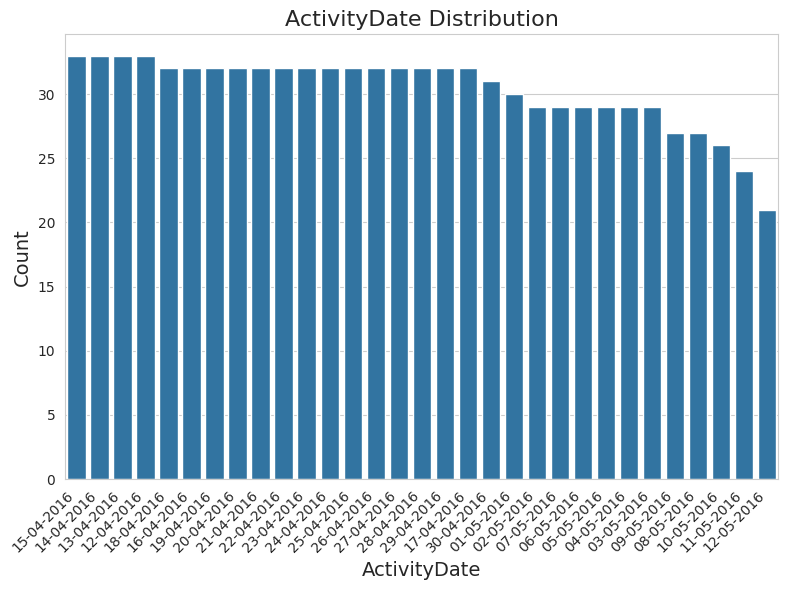

In [15]:
sns.set_style("whitegrid")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"{col} Distribution", fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel("Count", fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


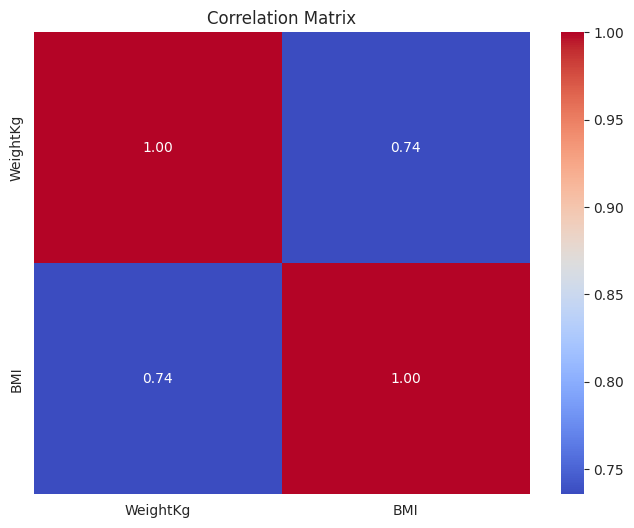

In [17]:
correlation_matrix = df[['WeightKg','BMI']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Top 10 Users based on the Total Steps

In [18]:
grouped_df = df.groupby(['Id', 'Name', 'ActivityDate'])['TotalSteps'].sum().reset_index()
sorted_df = grouped_df.sort_values(by='TotalSteps', ascending=False)
top_users_per_day = sorted_df.groupby('ActivityDate').head(10)
top_users_per_day_unique = top_users_per_day.drop_duplicates(subset='Id')
print(top_users_per_day_unique.head(10))

             Id             Name ActivityDate  TotalSteps
31   1624580081             isha   01-05-2016       36019
925  8877689391      nitu kumari   16-04-2016       29326
792  8053475328          gulshan   24-04-2016       22988
418  4388161847        anshu d/o   07-05-2016       22770
251  2347167796            meena   16-04-2016       22244
735  7007744171            rekha   29-04-2016       20067
703  6962181067        riya masi   23-04-2016       20031
615  6117666160         khushboo   21-04-2016       19542
184  2022484408           mazida   30-04-2016       18387
91   1644430081  smt shyani devi   30-04-2016       18213


In [19]:
filtered_df = df[df['TotalSteps'] > 0]
grouped_df = filtered_df.groupby(['Id', 'Name', 'ActivityDate'])['TotalSteps'].sum().reset_index()
sorted_df = grouped_df.sort_values(by='TotalSteps', ascending=True)
top_users_per_day = sorted_df.groupby('ActivityDate').head(10)
top_users_per_day_unique = top_users_per_day.drop_duplicates(subset='Id')
print(top_users_per_day_unique.head(10))

             Id                Name ActivityDate  TotalSteps
108  1844505072               divya   27-04-2016           4
602  6775888955               jyoti   03-05-2016           9
336  4020332650       shakshi sagar   17-04-2016          16
353  4319703577               neetu   12-05-2016          17
689  7086361926  leela with a child   16-04-2016          31
239  2347167796               meena   29-04-2016          42
823  8792009665              sunita   21-04-2016         144
123  1927972279               mansi   22-04-2016         149
169  2026352035               pooja   10-05-2016         254
512  5553957443               reena   17-04-2016         655


In [20]:
df['Score'] = (
    df['TotalSteps'] +
    df['TotalDistance'] +
    df['VeryActiveMinutes'] * 2 +  # Weighting VeryActiveMinutes more
    df['LightlyActiveMinutes'] +
    df['Calories'] * 0.1 +  # Weighting Calories less
    df['TotalMinutesAsleep'] * 0.5  # Weighting TotalMinutesAsleep less
)
user_scores = df.groupby(['Id', 'Name'])['Score'].sum()
top_users = user_scores.sort_values(ascending=False)
print("Top Users based on Multiple Criteria:")
print(top_users.head())

Top Users based on Multiple Criteria:
Id          Name        
3977333714  hina            328992.029998
1503960366  shivani         327249.479999
6962181067  riya masi       325965.460001
8378563200  rakhi @payal    296493.220002
5553957443  reena           288007.430001
Name: Score, dtype: float64


In [22]:
df['TotalActiveMinutes'] = (
    df['VeryActiveMinutes'] +
    df['FairlyActiveMinutes'] +
    df['LightlyActiveMinutes']
)
user_active_minutes = df.groupby(['Id','Name'])['TotalActiveMinutes'].sum()
top_users_most_active = user_active_minutes.sort_values(ascending=False)
top_users_least_active = user_active_minutes.sort_values(ascending=True)
print("Top Users with Most Active Minutes:")
print(top_users_most_active.head(10))

print("\nTop Users with Least Active Minutes:")
print(top_users_least_active.head(10))


Top Users with Most Active Minutes:
Id          Name       
2873212765  sonam          10175
2022484408  mazida          9706
8877689391  nitu kumari     9632
4558609924  manju           9581
6962181067  riya masi       8901
1503960366  shivani         8612
7007744171  rekha           8529
4388161847  anshu d/o       8459
4702921684  shakshi         8328
6117666160  khushboo        8175
Name: TotalActiveMinutes, dtype: int64

Top Users with Least Active Minutes:
Id          Name         
4057192912  anita             421
1927972279  mansi            1261
6775888955  jyoti            1715
4020332650  shakshi sagar    2712
8792009665  sunita           2807
8253242879  priya jain       2883
1844505072  divya            3623
2347167796  meena            5158
1624580081  isha             5207
8583815059  versha           5275
Name: TotalActiveMinutes, dtype: int64


In [23]:
df.corr()

<ipython-input-23-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Id,DailyAverageHeartrate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,SedentaryMinutes,Calories,TotalMinutesAsleep,TotalSleepRecords,TotalTimeInBed,BMI,WeightKg,WeightPounds,Score,TotalActiveMinutes
Id,1.000000,0.025746,0.185721,0.241000,0.238816,0.188015,0.308691,0.026665,0.019629,-0.015698,...,-0.043319,0.396671,0.082158,-0.011591,0.004339,-0.206405,0.351346,0.351356,0.017338,0.001749
DailyAverageHeartrate,0.025746,1.000000,0.011905,0.006944,-0.006373,0.295310,0.019918,-0.014005,-0.006615,0.009903,...,0.448825,-0.008056,-0.223199,-0.089167,-0.235916,0.111868,0.010750,0.010776,0.017488,0.082428
TotalSteps,0.185721,0.011905,1.000000,0.985369,0.984822,0.181849,0.740115,0.507105,0.692208,0.070505,...,-0.327484,0.591568,-0.190344,-0.160958,-0.166232,-0.163150,0.288910,0.288917,0.999505,0.772429
TotalDistance,0.241000,0.006944,0.985369,1.000000,0.999505,0.188332,0.794582,0.470758,0.662002,0.082389,...,-0.288094,0.644962,-0.176936,-0.142386,-0.161177,-0.092568,0.384915,0.384924,0.983845,0.722605
TrackerDistance,0.238816,-0.006373,0.984822,0.999505,1.000000,0.162585,0.794338,0.470277,0.661365,0.074591,...,-0.289343,0.645313,-0.177597,-0.142034,-0.161365,-0.090443,0.388842,0.388851,0.983989,0.721094
LoggedActivitiesDistance,0.188015,0.295310,0.181849,0.188332,0.162585,1.000000,0.150852,0.076527,0.138302,0.154996,...,-0.046999,0.207595,-0.038857,-0.045240,-0.058198,-0.074599,-0.158210,-0.158198,0.120903,0.163639
VeryActiveDistance,0.308691,0.019918,0.740115,0.794582,0.794338,0.150852,1.000000,0.192986,0.157669,0.046117,...,-0.061754,0.491959,-0.102781,-0.094602,-0.110379,0.011435,0.445055,0.445070,0.682551,0.311372
ModeratelyActiveDistance,0.026665,-0.014005,0.507105,0.470758,0.470277,0.076527,0.192986,1.000000,0.237847,0.005793,...,-0.221436,0.216790,-0.244494,-0.062232,-0.098495,-0.206122,-0.368064,-0.368069,0.567548,0.361552
LightActiveDistance,0.019629,-0.006615,0.692208,0.662002,0.661365,0.138302,0.157669,0.237847,1.000000,0.099503,...,-0.413552,0.466917,-0.050131,-0.100241,-0.097961,-0.249274,0.196948,0.196938,0.592737,0.871971
SedentaryActiveDistance,-0.015698,0.009903,0.070505,0.082389,0.074591,0.154996,0.046117,0.005793,0.099503,1.000000,...,0.035475,0.043652,-0.038505,-0.036885,-0.054456,-0.064128,-0.059364,-0.059348,0.046843,0.109891


In [24]:
efficiency = df[['TotalDistance', 'TotalSteps']].corr()
efficiency

,TotalDistance,TotalSteps
TotalDistance,1.000000,0.985369
TotalSteps,0.985369,1.000000


In [25]:
user_sleep_records = df.groupby('Name')['TotalSleepRecords'].sum()
print("Sleep Tracking Users by Name:")
print(user_sleep_records)

Sleep Tracking Users by Name:
Name
aasmin                 0.0
anita                  0.0
anshu d/o             30.0
buity                  0.0
divya                  3.0
gulshan                3.0
hina                  32.0
isha                   0.0
jyoti                  3.0
kajal                  1.0
kanika kathuria       39.0
khushboo              22.0
leela with a child    24.0
manju                  5.0
mansi                  8.0
mazida                 0.0
meena                 15.0
neetu                 27.0
neha                  27.0
nitu kumari            0.0
pooja                 28.0
priya jain             0.0
rakhi @payal          35.0
reena                 38.0
rekha                  2.0
riya masi             34.0
shakshi               29.0
shakshi sagar          8.0
shivani               27.0
smt shyani devi        4.0
sonam                  0.0
sunita                15.0
versha                 0.0
Name: TotalSleepRecords, dtype: float64


#Visualization

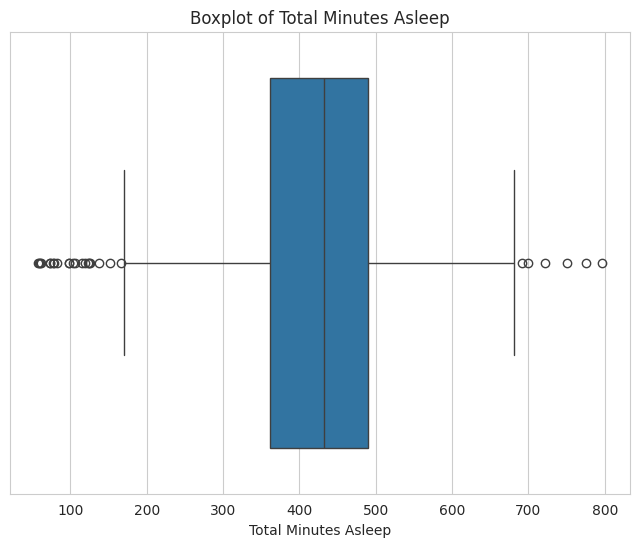

In [26]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='TotalMinutesAsleep', data=df)
plt.title('Boxplot of Total Minutes Asleep')
plt.xlabel('Total Minutes Asleep')
plt.show()

<ipython-input-27-dd0d4eff6b7c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


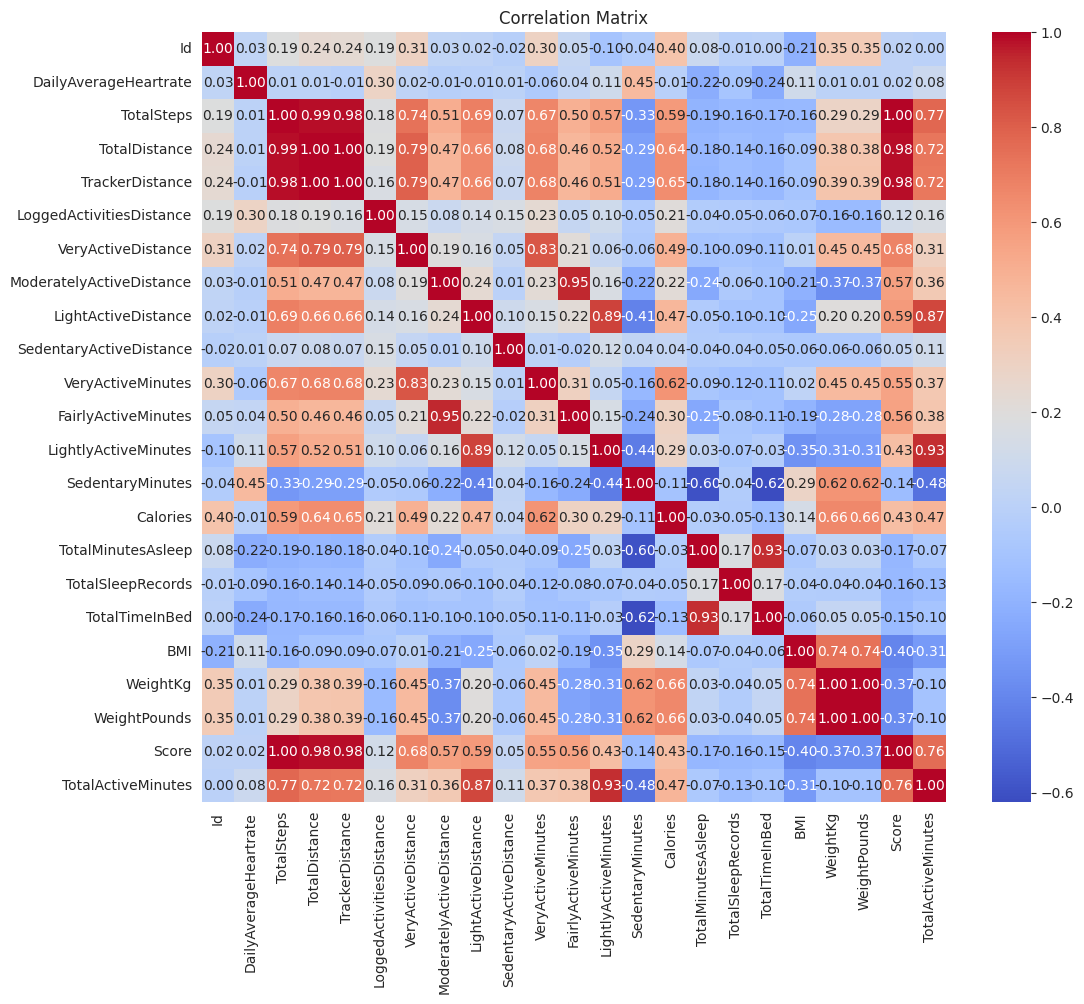

In [27]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

<ipython-input-30-83cde109e5ec>:1: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



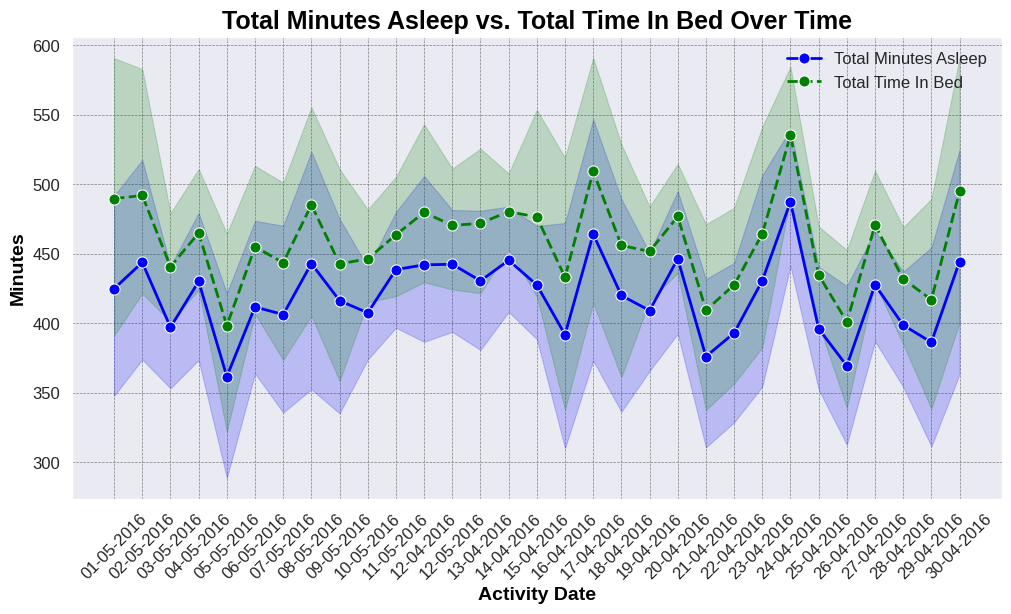

In [30]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(12, 6))
sns.set_context("paper", font_scale=1.2)
sns.lineplot(x='ActivityDate', y='TotalMinutesAsleep', data=df, marker='o', markersize=8, linestyle='-', linewidth=2, color='blue', label='Total Minutes Asleep')
sns.lineplot(x='ActivityDate', y='TotalTimeInBed', data=df, marker='o', markersize=8, linestyle='--', linewidth=2, color='green', label='Total Time In Bed')
plt.title('Total Minutes Asleep vs. Total Time In Bed Over Time', fontsize=18, fontweight='bold', color='black')
plt.xlabel('Activity Date', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Minutes', fontsize=14, fontweight='bold', color='black')
plt.legend(fontsize=12, shadow=True)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()


In [29]:
import plotly.express as px
user_total_steps = df.groupby('Name')['TotalSteps'].sum()
top_users = user_total_steps.sort_values(ascending=False).head(10)
top_users_reset_index = top_users.reset_index()
top_users_reset_index['Name'] = top_users_reset_index['Name'].astype(str)
custom_color_palette = px.colors.qualitative.Dark24[:10]
fig = px.bar(top_users_reset_index, x='Name', y='TotalSteps',
             labels={'Name': 'User ID', 'TotalSteps': 'Total Steps'},
             title='Top 10 Users by Total Steps',
             color='Name', color_discrete_sequence=custom_color_palette)
fig.update_xaxes(tickangle=45)
fig.show()

In [31]:
user_total_active_minutes = df.groupby('Name')[['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes']].sum()
user_total_active_minutes['TotalActiveMinutes'] = user_total_active_minutes.sum(axis=1)
top_users_active_minutes = user_total_active_minutes.sort_values(by='TotalActiveMinutes', ascending=False).head(10)
top_users_active_minutes_reset_index = top_users_active_minutes.reset_index()
melted_df = top_users_active_minutes_reset_index.melt(id_vars='Name', value_vars=['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes'],
                                                     var_name='ActivityType', value_name='ActiveMinutes')
fig = px.bar(melted_df, x='Name', y='ActiveMinutes', color='ActivityType',
             title='Top 10 Users by Most Active Minutes',
             labels={'Name': 'User ID', 'ActiveMinutes': 'Total Active Minutes', 'ActivityType': 'Activity Type'},
             barmode='group')
fig.update_xaxes(tickangle=45)
fig.show()

In [32]:
minutes_columns = ['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']
fig_minutes = px.bar(df, x='ActivityDate', y=minutes_columns,
                     title='Activity Minutes Categories by Date',
                     labels={'ActivityDate': 'Date', 'value': 'Minutes'},
                     color_discrete_map={'VeryActiveMinutes': 'blue',
                                         'FairlyActiveMinutes': 'green',
                                         'LightlyActiveMinutes': 'orange',
                                         'SedentaryMinutes': 'red'},
                     barmode='stack')
fig_minutes.update_layout(
    xaxis_title_font=dict(size=14, family='Arial', color='black'),
    yaxis_title_font=dict(size=14, family='Arial', color='black'),
    legend_title_font=dict(size=14, family='Arial', color='black'),
    legend_font=dict(size=12, family='Arial', color='black'),
    title_font=dict(size=18, family='Arial', color='black'),
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(family="Arial", size=12, color="black"),
    margin=dict(l=50, r=50, t=80, b=50),
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False)
)

# Show the plot
fig_minutes.show()


In [33]:
distance_columns = ['VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance']
fig_distance = px.bar(df, x='ActivityDate', y=distance_columns,
                      title='Distance Categories by Activity Date',
                      labels={'ActivityDate': 'Date', 'value': 'Distance'},
                      barmode='stack')

fig_distance.update_layout(
    xaxis_title_font=dict(size=14, family='Arial', color='black'),
    yaxis_title_font=dict(size=14, family='Arial', color='black'),
    legend_title_font=dict(size=14, family='Arial', color='black'),
    legend_font=dict(size=12, family='Arial', color='black'),
    title_font=dict(size=18, family='Arial', color='black'),
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(family="Arial", size=12, color="black"),
    margin=dict(l=50, r=50, t=80, b=50),
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False)
)

# Show the plot
fig_distance.show()


In [34]:
fig3 = px.bar(df, x='ActivityDate', y='Calories',
              title='Activity Date vs. Calories',
              labels={'ActivityDate': 'Activity Date', 'Calories': 'Calories'},
              color_discrete_sequence=['yellow'])
fig3.update_layout(
    xaxis_title_font=dict(size=14, family='Arial', color='black'),
    yaxis_title_font=dict(size=14, family='Arial', color='black'),
    legend_title_font=dict(size=14, family='Arial', color='black'),
    legend_font=dict(size=12, family='Arial', color='black'),
    title_font=dict(size=18, family='Arial', color='black'),
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(family="Arial", size=12, color="black"),
    margin=dict(l=50, r=50, t=80, b=50)
)
# Show the plot
fig3.show()


In [35]:
import plotly.express as px

# Create the pair plot using Plotly Express
fig = px.scatter_matrix(df[['TotalSteps', 'TotalDistance', 'Calories']],
                        title='Pair Plot: Total Steps, Total Distance, and Calories',
                        labels={'TotalSteps': 'Total Steps', 'TotalDistance': 'Total Distance', 'Calories': 'Calories'},
                        color_discrete_sequence=['green'])

# Update layout for a cleaner appearance
fig.update_layout(
    title_font=dict(size=18, family='Arial', color='black'),
    font=dict(family="Arial", size=12, color="black"),  # Global font settings
    plot_bgcolor='white',       # Background color
    paper_bgcolor='white',      # Plot area background color
)

# Show the plot
fig.show()


In [37]:
fig2 = px.scatter(df, x='SedentaryMinutes', y='TotalMinutesAsleep',
                  title='Scatter Plot: Sedentary Minutes vs. Total Minutes Asleep',
                  labels={'SedentaryMinutes': 'Sedentary Minutes', 'TotalMinutesAsleep': 'Total Minutes Asleep'},
                  color_discrete_sequence=['green'])

# Update layout for a cleaner appearance
fig2.update_layout(
    title_font=dict(size=18, family='Arial', color='black'),
    font=dict(family="Arial", size=12, color="black"),  # Global font settings
    plot_bgcolor='white',       # Background color
    paper_bgcolor='white',      # Plot area background color
)

# Show the plot
fig2.show()


In [38]:
fig1 = px.scatter(df, x='TotalMinutesAsleep', y='TotalTimeInBed',
                  title='Scatter Plot: Total Minutes Asleep vs. Total Time in Bed',
                  labels={'TotalMinutesAsleep': 'Total Minutes Asleep', 'TotalTimeInBed': 'Total Time in Bed'},
                  color_discrete_sequence=['purple'])

# Update layout for a cleaner appearance
fig1.update_layout(
    title_font=dict(size=18, family='Arial', color='black'),
    font=dict(family="Arial", size=12, color="black"),  # Global font settings
    plot_bgcolor='white',       # Background color
    paper_bgcolor='white',      # Plot area background color
)

# Show the plot
fig1.show()


In [39]:
fig2 = px.scatter(df, x='TotalSteps', y='Calories',
                  title='Scatter Plot: Total Steps vs. Calories',
                  labels={'TotalSteps': 'Total Steps', 'Calories': 'Calories'},
                  color_discrete_sequence=['orange'])

# Update layout for a cleaner appearance
fig2.update_layout(
    title_font=dict(size=18, family='Arial', color='black'),
    font=dict(family="Arial", size=12, color="black"),  # Global font settings
    plot_bgcolor='white',       # Background color
    paper_bgcolor='white',      # Plot area background color
)

# Show the plot
fig2.show()


In [40]:
columns_of_interest = ['TotalSteps', 'TotalDistance', 'TrackerDistance',
                       'LoggedActivitiesDistance', 'VeryActiveDistance',
                       'ModeratelyActiveDistance', 'LightActiveDistance',
                       'SedentaryActiveDistance']
subset_df = df[columns_of_interest]
correlation_matrix = subset_df.corr()
color_scale = [
    (0, 'rgb(144,238,144)'),  # Light Green
    (correlation_matrix.min().min(), 'rgb(255,255,255)'),  # White
    (correlation_matrix.max().max(), 'rgb(255,0,0)')  # Red
]
fig = px.imshow(correlation_matrix,
                labels=dict(color="Correlation"),
                x=correlation_matrix.index,
                y=correlation_matrix.columns,
                color_continuous_scale=color_scale)
fig.update_layout(title_text='Correlation Matrix for Steps and Distances',
                  title_font=dict(size=18, family='Arial', color='black'),
                  font=dict(family="Arial", size=12, color="black"),
                  plot_bgcolor='white',
                  paper_bgcolor='white')

# Show the plot
fig.show()
